In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
# Getting Dataset
data=pd.read_csv("hotel_review_final.csv")

In [5]:
#getting info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               20000 non-null  object 
 1   Additional_Number_of_Scoring                20000 non-null  int64  
 2   Review_Date                                 20000 non-null  object 
 3   Average_Score                               20000 non-null  float64
 4   Hotel_Name                                  20000 non-null  object 
 5   Reviewer_Nationality                        20000 non-null  object 
 6   Negative_Review                             20000 non-null  object 
 7   Review_Total_Negative_Word_Counts           20000 non-null  int64  
 8   Total_Number_of_Reviews                     20000 non-null  int64  
 9   Positive_Review                             20000 non-null  object 
 10  Review_Tot

In [6]:
#Description of dataset
description=data.describe()

In [7]:
#checking for null values
data.isnull().sum()

Hotel_Address                                  0
Additional_Number_of_Scoring                   0
Review_Date                                    0
Average_Score                                  0
Hotel_Name                                     0
Reviewer_Nationality                           0
Negative_Review                                0
Review_Total_Negative_Word_Counts              0
Total_Number_of_Reviews                        0
Positive_Review                                0
Review_Total_Positive_Word_Counts              0
Total_Number_of_Reviews_Reviewer_Has_Given     0
Reviewer_Score                                 0
Tags                                           0
days_since_review                              0
lat                                           12
lng                                           12
dtype: int64

In [8]:
#getting unique value count of the columns
data.nunique()

Hotel_Address                                   454
Additional_Number_of_Scoring                    278
Review_Date                                     731
Average_Score                                    29
Hotel_Name                                      454
Reviewer_Nationality                            142
Negative_Review                               16206
Review_Total_Negative_Word_Counts               340
Total_Number_of_Reviews                         408
Positive_Review                               13820
Review_Total_Positive_Word_Counts               184
Total_Number_of_Reviews_Reviewer_Has_Given       91
Reviewer_Score                                   37
Tags                                           5504
days_since_review                               731
lat                                             452
lng                                             452
dtype: int64

In [9]:
# append the positive and negative text reviews
data_review=data.copy()

In [10]:
data_review["review"] = data_review["Negative_Review"] + data_review["Positive_Review"]

In [11]:
# create the label
data_review["is_bad_review"] = data_review["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)

In [12]:
# select only relevant columns
data_selected = data_review[["review", "is_bad_review"]]
data_selected.head()

,review,is_bad_review
0,High time to change the mattress in room 1030...,0
1,When we arrived we stood at reception while s...,1
2,That we had to leave Warm and welcoming atmo...,0
3,The bathroom smelt of damp drains room 413 No...,0
4,Room size is small and dated decor no privacy...,0


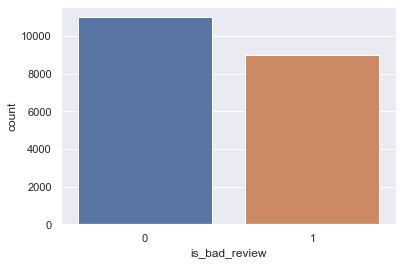

In [13]:
#counting Number of id_bad_review in selected_data
sns.countplot(x=data_selected["is_bad_review"])

In [14]:
# remove 'No Negative' or 'No Positive' from text
data_selected["review"] = data_selected["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
import nltk
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [16]:
data_selected["review_clean"] = data_selected["review"].apply(lambda x: clean_text(x))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\VAISHNAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
data_selected["sentiments"] = data_selected["review"].apply(lambda x: sid.polarity_scores(x))
data_selected = pd.concat([data_selected.drop(['sentiments'], axis=1), data_selected['sentiments'].apply(pd.Series)], axis=1)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
# add number of characters column
data_selected["nb_chars"] = data_selected["review"].apply(lambda x: len(x))

In [20]:
# add number of words column
data_selected["nb_words"] = data_selected["review"].apply(lambda x: len(x.split(" ")))

In [21]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(data_selected["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = data_selected.index
data_selected = pd.concat([data_selected, tfidf_df], axis=1)

In [22]:
# show is_bad_review distribution
data_selected["is_bad_review"].value_counts(normalize = True)

0    0.55
1    0.45
Name: is_bad_review, dtype: float64

In [23]:
# highest positive sentiment reviews (with more than 5 words)
data_selected[data_selected["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

,review,pos
2910,Excellent helpful staff comfort,0.900
5480,N a Friendly helpful staff,0.857
8176,Friendly helpful staff,0.857
8485,Great location good room Perfect,0.843
1052,lovely helpful staff great location,0.843
19026,Location perfect Friendly and comfortable,0.836
2363,Great location Clean and comfortable,0.835
9715,Comfortable clean friendly breakfast was good...,0.832
6471,Excellent friendly staff good location,0.831
11136,Great location Friendly competent staff,0.828


In [24]:
# lowest negative sentiment reviews (with more than 5 words)
data_selected[data_selected["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

,review,neg
14681,No A C,1.000
11615,Abusive sarcastic m staff,0.861
18695,Dirty very dirty,0.859
11308,Noisy unpleasant staff poor room,0.798
18916,Lousy hotel Lousy hotel,0.778
7451,Poor service Poor service,0.756
19989,Poor staff Poor gym Poor room,0.756
11051,dirty and tired breakfast,0.744
7915,the stuff was bad very bad bad bad Nothing,0.737
6311,Terrible overpriced place Avoid,0.726


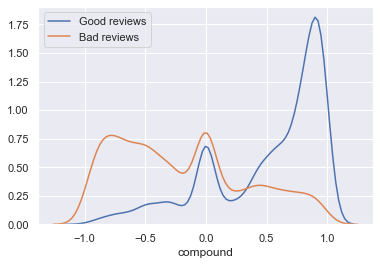

In [25]:
for x in [0, 1]:
    subset = data_selected[data_selected['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [26]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in data_selected.columns if c not in ignore_cols]

In [27]:
# split the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_selected[features], data_selected[label], test_size = 0.20, random_state = 42)
# train a random forest classifier



In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print("Accuracy Score: ", accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest
Accuracy Score:  0.83175
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2126
           1       0.81      0.83      0.82      1874

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.83      0.83      0.83      4000



In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc=dtc.predict(X_test)
print("Decision Tree")
print("Accuracy Score: ", accuracy_score(y_test,y_pred_dtc))
print(classification_report(y_test,y_pred_dtc))

Decision Tree
Accuracy Score:  0.75875
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      2126
           1       0.75      0.73      0.74      1874

    accuracy                           0.76      4000
   macro avg       0.76      0.76      0.76      4000
weighted avg       0.76      0.76      0.76      4000



In [39]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2',C=100, max_iter=10000)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print("Logistic Regression")
print("Accuracy Score: ", accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

Logistic Regression
Accuracy Score:  0.8275
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2126
           1       0.82      0.80      0.81      1874

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.83      0.83      0.83      4000



In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
print("Gradient Boosting")
print("Accuracy Score: ", accuracy_score(y_test,y_pred_gbc))
print(classification_report(y_test,y_pred_gbc))

Gradient Boosting
Accuracy Score:  0.8145
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      2126
           1       0.80      0.80      0.80      1874

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.81      0.81      0.81      4000



In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
nb = GaussianNB() 
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes")
print("Accuracy Score: ", accuracy_score(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))

Naive Bayes
Accuracy Score:  0.78275
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2126
           1       0.77      0.77      0.77      1874

    accuracy                           0.78      4000
   macro avg       0.78      0.78      0.78      4000
weighted avg       0.78      0.78      0.78      4000



In [37]:
from sklearn.svm import SVC
svm = SVC(C=1, kernel='rbf', gamma='auto')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM RBF")
print("Accuracy Score: ", accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

SVM RBF
Accuracy Score:  0.67425
              precision    recall  f1-score   support

           0       0.64      0.87      0.74      2126
           1       0.76      0.45      0.56      1874

    accuracy                           0.67      4000
   macro avg       0.70      0.66      0.65      4000
weighted avg       0.70      0.67      0.66      4000



In [ ]:
## Conclusion 
#the best model is Logistic Regression because it has best accuracy